**Setup & Load Data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

CSV_PATH = r"D:\MSC.AI__CW\NN-1\data\processed\labels_processed.csv"
df = pd.read_csv(CSV_PATH)

print(df.shape)
df.head()


(14185, 9)


,review_id,business_id,image_path,text,useful,funny,cool,label,split
0,6wSoUT-j8hWzNbMfxrFGrg,DzzVSYXadZ1_XgfGz_Loyw,k_PSngRS22mSA1MypwrjPg.jpg,For my birthday cake here yesterday. Prompt se...,0,0,0,0,train
1,lxNqIXG9HqXvmXJb8ZhGGQ,Xdzir62WKlSzeu4PMQtlBA,D_94KivwVgitkzFIgE_KcQ.jpg,This review is more about cost then product fo...,0,0,0,0,train
2,CDcjlM31O4Vh0Y8k1TvvDA,z0HzwNBmx_BgdiYI4hLk3g,Hf39P7_G_eRCqfVwvMDV6g.jpg,Service was very poor. Beers were good but not...,0,0,0,0,train
3,GdRt1uB8DPVpBBgYPar4kg,HzRSWmNxcEVQGrr1tun25w,agxl4sABeRXwjLL506KMrQ.jpg,"While the food and drinks are decent at best, ...",11,0,0,1,train
4,iwQzRNkMcbkZehpjGYRNqA,CMnrIvac5TRbYnUJgKHupQ,1xRB1ZqabgVbsM308vOrow.jpg,Artisan cocktails in an old warehouse-type pla...,3,0,1,1,train


**Sanity Check**

In [5]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14185 entries, 0 to 14184
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    14185 non-null  object
 1   business_id  14185 non-null  object
 2   image_path   14185 non-null  object
 3   text         14185 non-null  object
 4   useful       14185 non-null  int64 
 5   funny        14185 non-null  int64 
 6   cool         14185 non-null  int64 
 7   label        14185 non-null  int64 
 8   split        14185 non-null  object
dtypes: int64(4), object(5)
memory usage: 997.5+ KB


review_id      0
business_id    0
image_path     0
text           0
useful         0
funny          0
cool           0
label          0
split          0
dtype: int64

**Split Distribution**


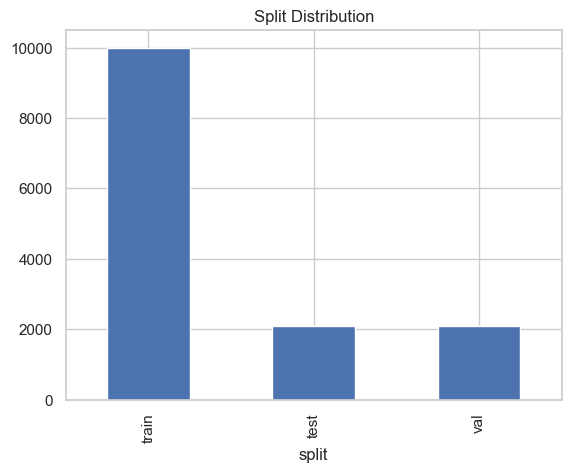

In [6]:
df["split"].value_counts().plot(kind="bar", title="Split Distribution")
plt.show()


**Label Distribution**

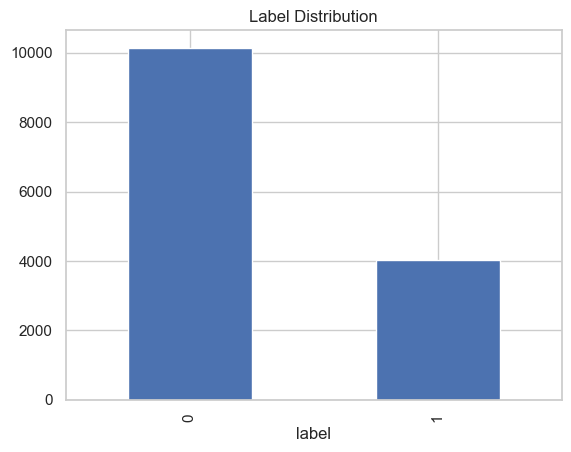

label
0    0.715263
1    0.284737
Name: count, dtype: float64

In [7]:
label_counts = df["label"].value_counts()
label_counts.plot(kind="bar", title="Label Distribution")
plt.show()

label_counts / label_counts.sum()


**Label vs Votes**

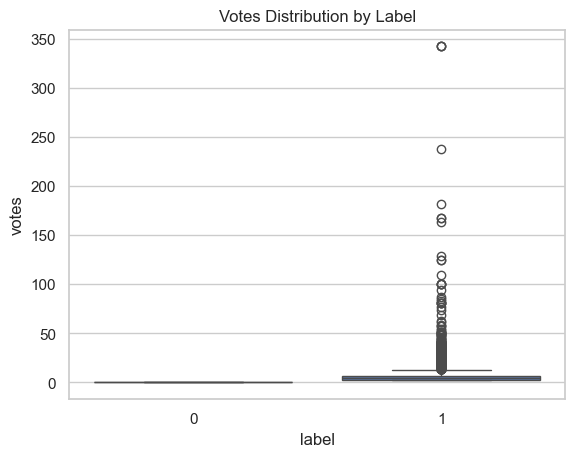

In [8]:
df["votes"] = df["useful"] + df["funny"] + df["cool"]

sns.boxplot(x="label", y="votes", data=df)
plt.title("Votes Distribution by Label")
plt.show()


**Votes Histogram**

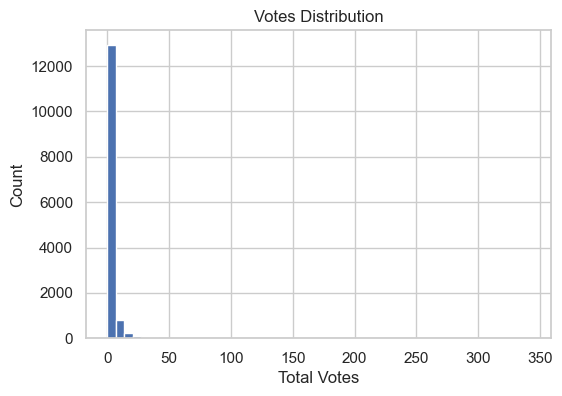

In [9]:
plt.figure(figsize=(6,4))
plt.hist(df["votes"], bins=50)
plt.title("Votes Distribution")
plt.xlabel("Total Votes")
plt.ylabel("Count")
plt.show()


**Text Length Analysis**

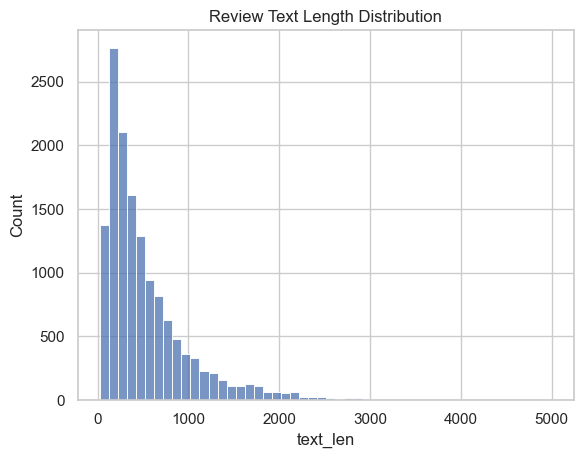

count    14185.000000
mean       542.914910
std        520.280199
min         30.000000
25%        205.000000
50%        377.000000
75%        685.000000
max       4994.000000
Name: text_len, dtype: float64

In [10]:
df["text_len"] = df["text"].str.len()

sns.histplot(df["text_len"], bins=50)
plt.title("Review Text Length Distribution")
plt.show()

df["text_len"].describe()


**Images per Business**

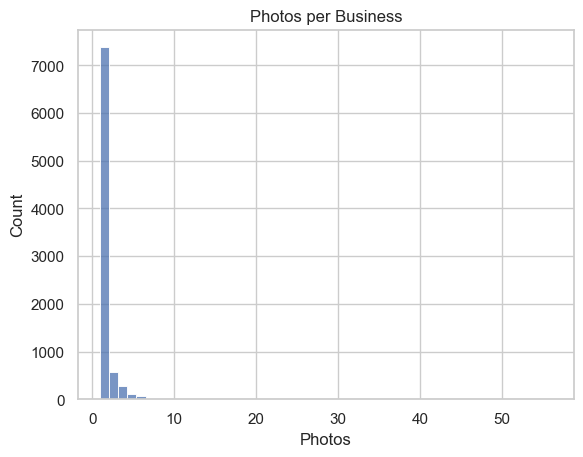

In [11]:
photos_per_business = df.groupby("business_id").size()

sns.histplot(photos_per_business, bins=50)
plt.title("Photos per Business")
plt.xlabel("Photos")
plt.show()


**Class Balance per Split**

In [12]:
pd.crosstab(df["split"], df["label"], normalize="index")


label,0,1
split,,
test,0.705994,0.294006
train,0.720828,0.279172
val,0.697887,0.302113


EDA Summary:
- Dataset is moderately imbalanced (~ 72/28)
- Labels correlate with engagement votes but remain noisy
- Text length is short -> RoBERTa max_length=128 is appropriate
- Multiple photos per business -> group-based splitting is required
- Noise explains ceiling around ~0.60 F1